In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

**Read Dataset**

In [2]:
df = pd.read_csv('/content/credit_risk_dataset - credit_risk_dataset.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


**Data Preprocessing**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

**Handle Missing Values**

In [7]:
# Handle missing values
df.fillna(df.mean(), inplace=True)

<ipython-input-7-215a67fbbad9>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


**EDA**

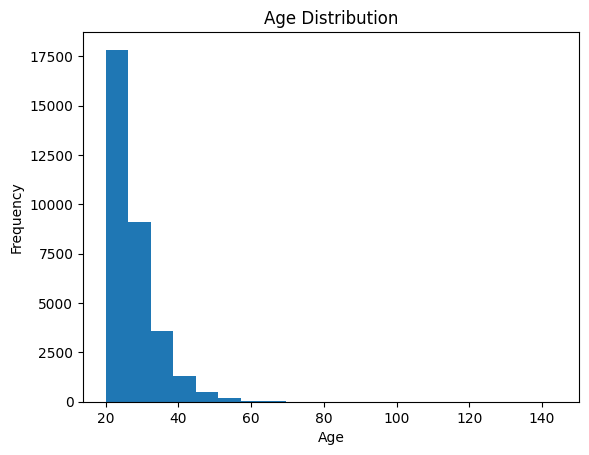

In [8]:
# Example: Plot a histogram of person_age
plt.hist(df['person_age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()
# Repeat similar plots for other features

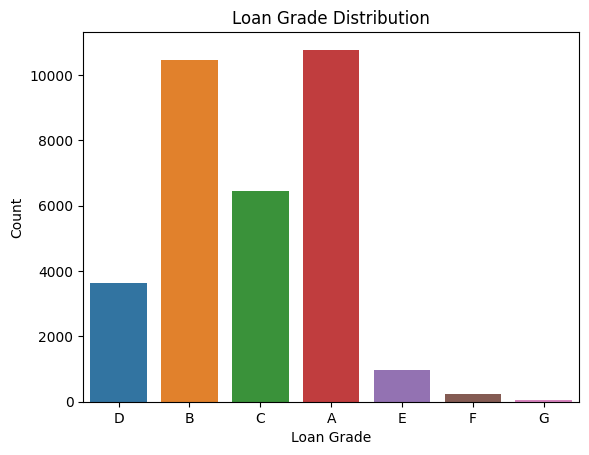

In [9]:
sns.countplot(x='loan_grade', data=df)
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.title('Loan Grade Distribution')
plt.show()

<ipython-input-10-182fd031f822>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


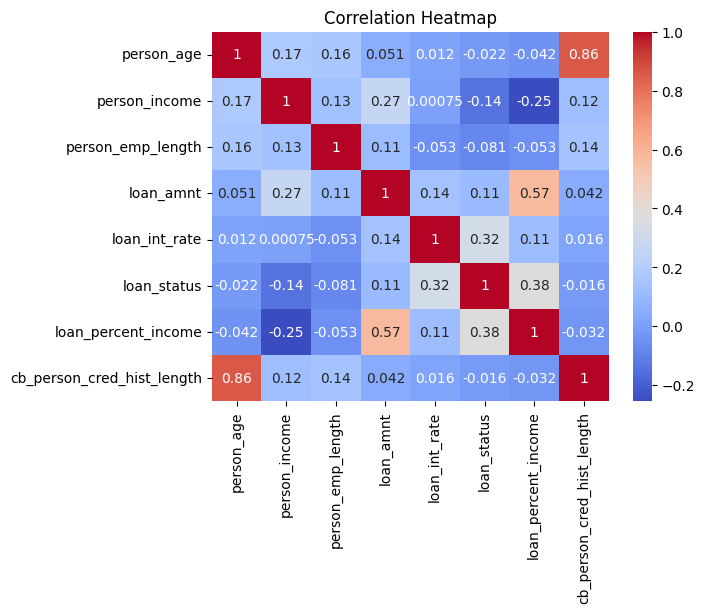

In [10]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

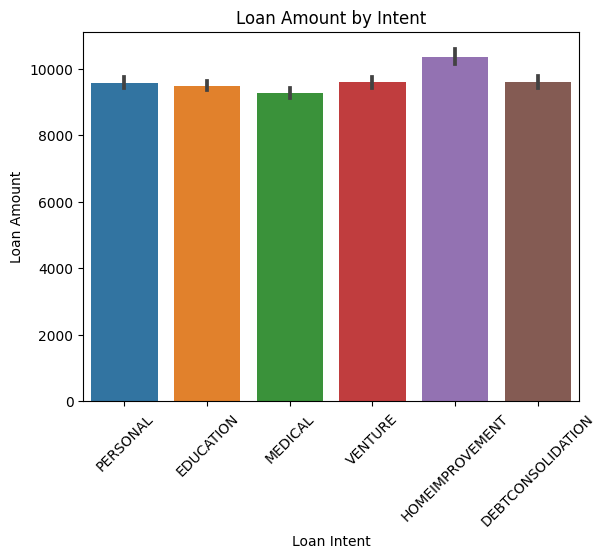

In [11]:
sns.barplot(x='loan_intent', y='loan_amnt', data=df)
plt.xlabel('Loan Intent')
plt.ylabel('Loan Amount')
plt.title('Loan Amount by Intent')
plt.xticks(rotation=45)
plt.show()

**Handle Categorical Values**

In [12]:

# Encode categorical variables
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])



**Feature Scaling**

In [13]:
# Scale numerical features
scaler = StandardScaler()
df[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']] = scaler.fit_transform(df[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']])


**Train test split**

In [14]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model Building**

In [15]:
# Define the model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

**Model Compile**

In [16]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


**Model Training**

In [17]:
# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.3)



Epoch 1/25
571/571 [==============================] - 5s 6ms/step - loss: 0.3213 - accuracy: 0.8737 - val_loss: 0.2740 - val_accuracy: 0.9013
Epoch 2/25
571/571 [==============================] - 3s 5ms/step - loss: 0.2573 - accuracy: 0.9107 - val_loss: 0.2544 - val_accuracy: 0.9116
Epoch 3/25
571/571 [==============================] - 4s 7ms/step - loss: 0.2402 - accuracy: 0.9168 - val_loss: 0.2487 - val_accuracy: 0.9168
Epoch 4/25
571/571 [==============================] - 3s 6ms/step - loss: 0.2307 - accuracy: 0.9216 - val_loss: 0.2589 - val_accuracy: 0.9104
Epoch 5/25
571/571 [==============================] - 4s 7ms/step - loss: 0.2237 - accuracy: 0.9234 - val_loss: 0.2479 - val_accuracy: 0.9160
Epoch 6/25
571/571 [==============================] - 3s 5ms/step - loss: 0.2223 - accuracy: 0.9238 - val_loss: 0.2427 - val_accuracy: 0.9168
Epoch 7/25
571/571 [==============================] - 4s 8ms/step - loss: 0.2151 - accuracy: 0.9278 - val_loss: 0.2468 - val_accuracy: 0.9136
Epoch 

**Learning Curves**

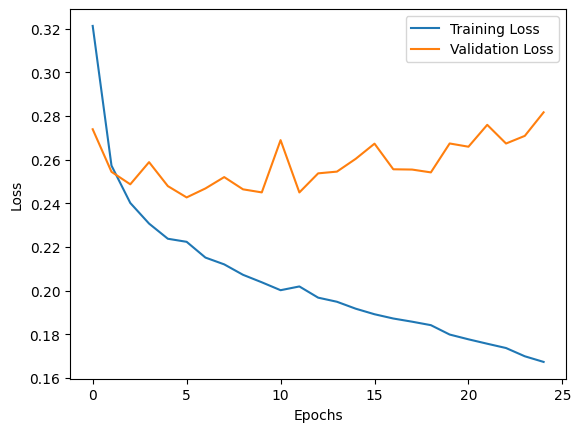

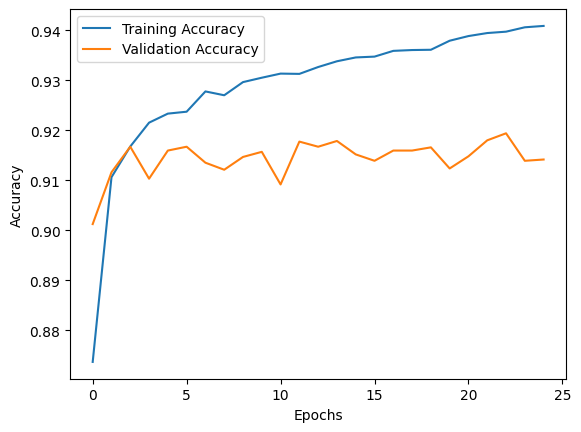

In [18]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Evaluate the model on the test set**

In [19]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

204/204 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.9138
Test Loss: 0.2955729365348816
Test Accuracy: 0.9137639999389648
